<a href="https://colab.research.google.com/github/bobbyknit007/ML/blob/main/Regression/CarPrice_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [27]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [28]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [29]:
df.duplicated().sum()

763

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(3577, 8)

In [32]:
def remove_outliers(data_frame, series_col):
 Q1 = np.percentile(series_col, 25)
 Q3 = np.percentile(series_col, 75)
 IQR = Q3 - Q1
 Lower_Limit = Q1 - 1.5 * IQR
 Upper_Limit = Q3 + 1.5 * IQR
 data_frame = data_frame[(series_col >Lower_Limit) & (series_col < Upper_Limit)]
 return data_frame

In [33]:
df['brand']=df['name'].str.split(' ').str.get(0)
df['car_age']=2021-df['year']
df.drop(['name','year'], axis=1, inplace=True)

In [34]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,14
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,14
2,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,9
3,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,7


In [35]:
label_encoder = LabelEncoder()
def label_encoding(series_col):
  return label_encoder.fit_transform(series_col)

In [36]:
onehot_encoder = OneHotEncoder()
def onehot_encoding(series_col):
  return onehot_encoder.fit_transform(series_col)

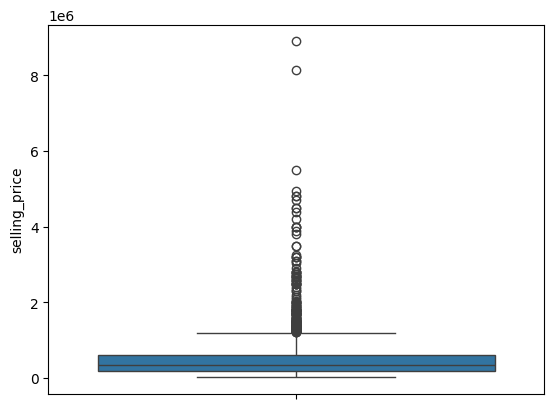

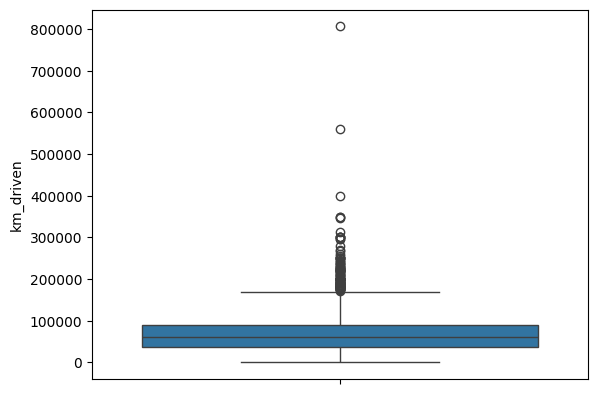

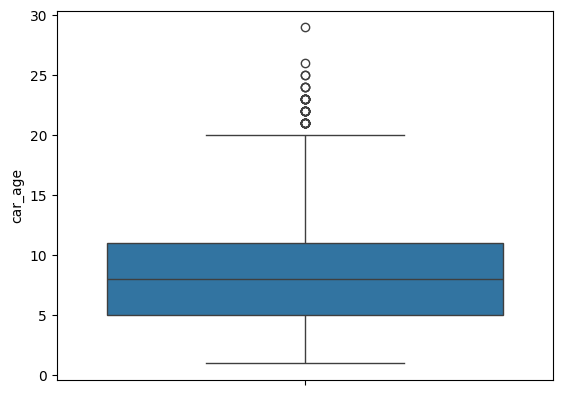

In [37]:
int_cols=df.select_dtypes('int64').columns
for col in int_cols:
  sns.boxplot(df[col])
  plt.show()

In [38]:
df.describe()

,selling_price,km_driven,car_age
count,3.577000e+03,3577.000000,3577.000000
mean,4.739125e+05,69250.545709,8.037462
std,5.093018e+05,47579.940016,4.251759
min,2.000000e+04,1.000000,1.000000
25%,2.000000e+05,36000.000000,5.000000
50%,3.500000e+05,60000.000000,8.000000
75%,6.000000e+05,90000.000000,11.000000
max,8.900000e+06,806599.000000,29.000000


In [39]:
df=remove_outliers(df,df['selling_price'])
df=remove_outliers(df,df['km_driven'])

In [40]:
df.shape

(3272, 8)

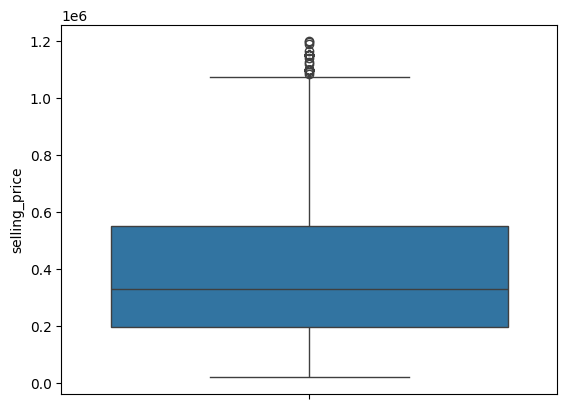

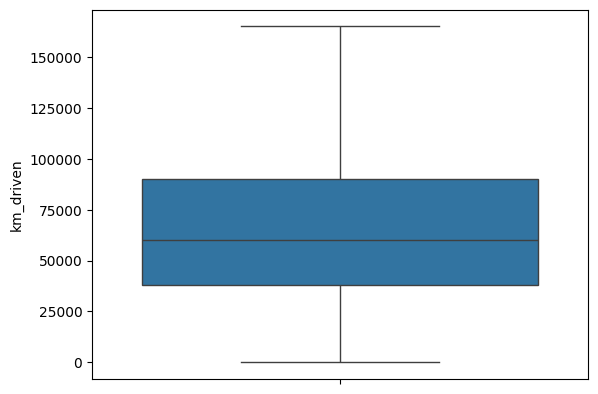

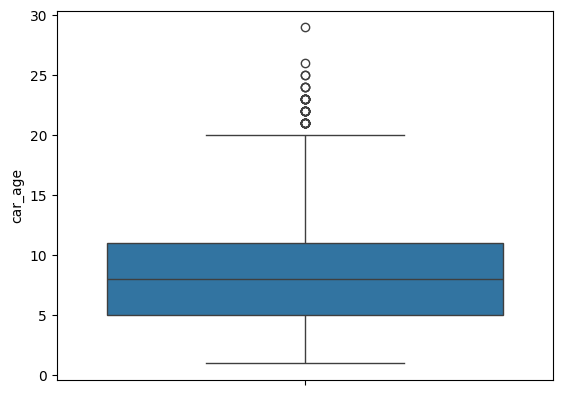

In [41]:
int_cols=df.select_dtypes('int64').columns
for col in int_cols:
  sns.boxplot(df[col])
  plt.show()

In [42]:
print(df.columns)

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'brand', 'car_age'],
      dtype='object')


After removing outliers, data still has outliers - what to do in this case ?

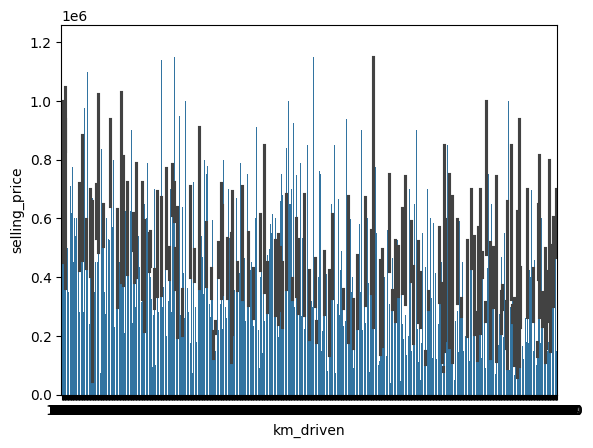

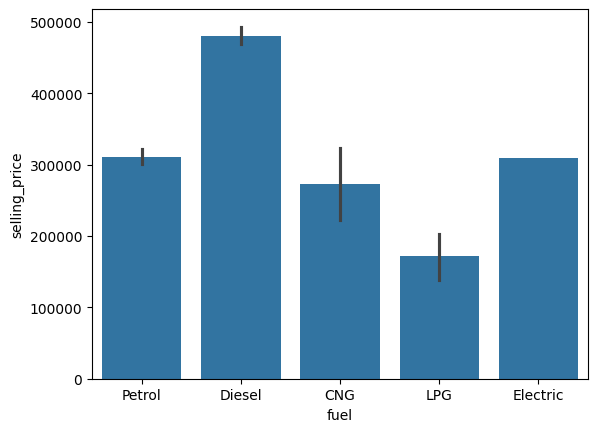

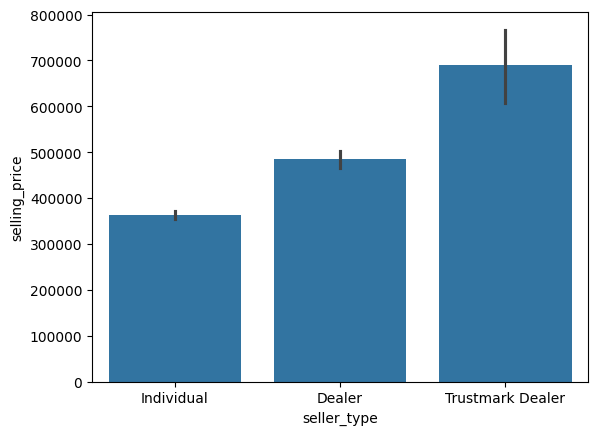

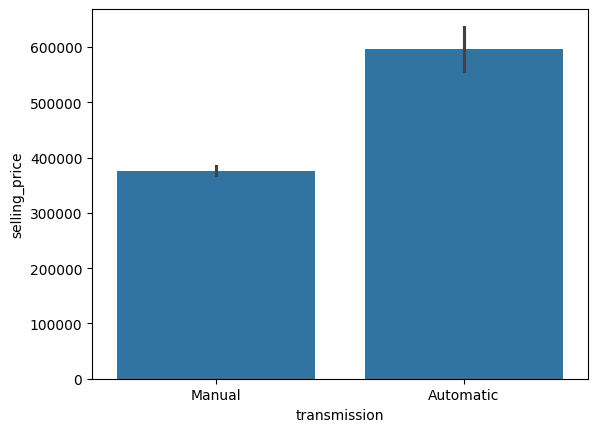

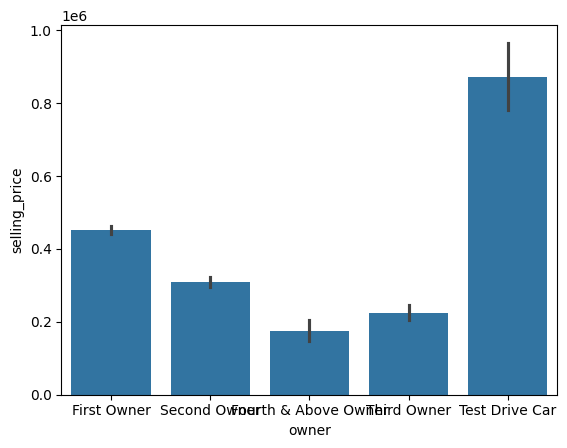

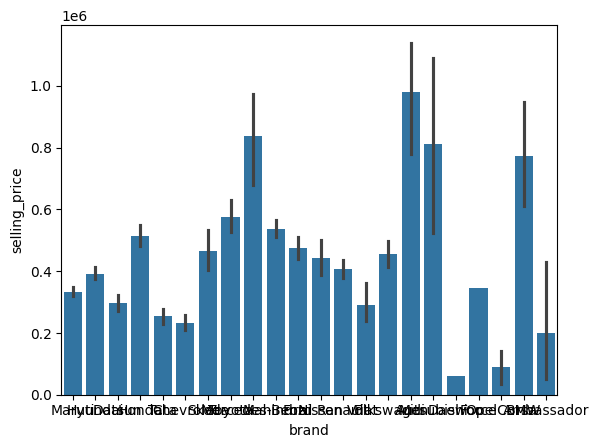

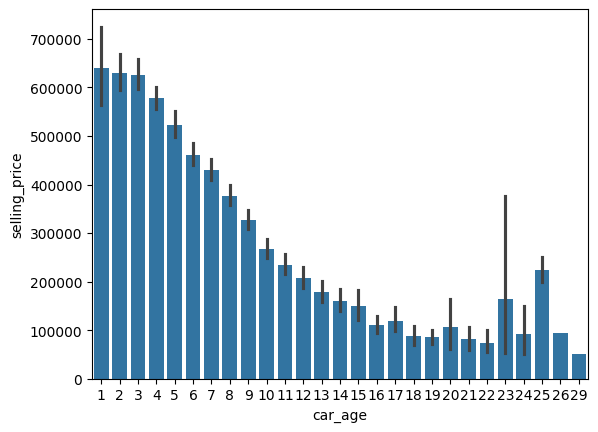

In [46]:
#Encode categorical columns
cate_cols = df.columns

for col in cate_cols:
  if(col!='selling_price'):
   sns.barplot(data=df, x=col, y='selling_price')
   plt.show()

All these parameters are distributed better(uniformly). And affect the target feature selling_price. How much each parameter affect selling_price , relativley, we will have to use heatmap for that. but to use heatmap we will have to convert categorical columns to numerical columns.

In [47]:
cate_cols= df.select_dtypes('object')
for col in cate_cols:
  df[(col+'_encode')]=label_encoding(df[col])

In [48]:
df.head(5)

,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,car_age,fuel_encode,seller_type_encode,transmission_encode,owner_encode,brand_encode
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,14,4,1,1,0,12
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,14,4,1,1,0,12
2,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,9,1,1,1,0,10
3,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,4,4,1,1,0,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,7,1,1,1,2,9


<Axes: >

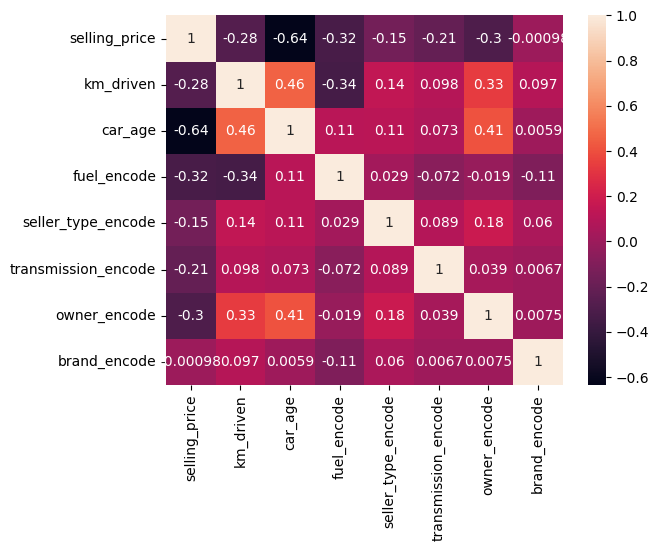

In [49]:
num_cols = df.select_dtypes('int64').columns
corr=df[num_cols].corr()
sns.heatmap(corr, annot=True)
